  SWMAL Opgave

## Dataanalyse

### Qa) Beskrivelse af datasæt til O4 projekt

I forbindelse med vores O4 projekt har vi valgt at arbejde med image recognition. Vi vil udvikle en model, som kan analysere og identificere de forskellige vejrforhold på billeder. Dette kan være Cloudy, Rainy, Sunny eller Sunrise. For at opnå dette mål vil vi at bruge en klassifikationsmetode, hvor billeder kategoriseres, så vores model kan trænes til at forudsige vejret, når det præsenteres med et nyt billede.

Vi står over for en multi-class image classification-opgave, da der er fire forskellige vejrtilstande, som skal genkendes. Denne opgave vil blive løst ved hjælp af supervised learning, hvor vi træner vores model vha. et datasæt

For at lave denne model har vi hentet data fra kaggle, som er en platform, der udbyder store dataset. Vi har et datasæt som består af ca. 1200 billeder, opdelt i de 4 kategorier. Der vil være ca. 300 samples pr. kategori til at træne/teste vores model. Disse samples består af forskellige billeder, som hver især illustrerer en af de fire kategorier af vejr, Sunny, Rainy, Cloudy og Sunrise, som vil være vores target værdier.

Datasættet vil derfor blive opdelt i tre sæt: træningssæt til at træne modellen, valideringssæt til at finjustere modelparametre og teste ydeevnen, og testsæt til endelig evaluering af modellen.

Når vi arbejder med image recognition, kan det være lidt sværere at identificere fejl i dataene. 
Der kan forekomme eventuelle fejl og usikkerheder  i form af belysning, synsvinkler eller andre faktorer, som vil påvirke billedernes kvalitet. Det kan også være, at et af billederne er havnet i den forkerte kategori i træningssættet, altså er der fejl i labels. På denne måde vil vores model ikke trænes korrekt til at predict vores targetværdier. Der vil blive lavet en dataanalyse af vores datasæt for at identificere korrupte data. 

Dette projekt sigter altså mod at udvikle en image recognition-model til at identificere vejrforhold på billeder ved hjælp af supervised learning.


### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


Data              dataanalyse.ipynb pipelines.ipynb   weather_dataset
Failed to load image: weather_dataset/Shine/shine131.jpg
Failed to load image: weather_dataset/Rain/rain141.jpg
(1120, 128, 128, 3)


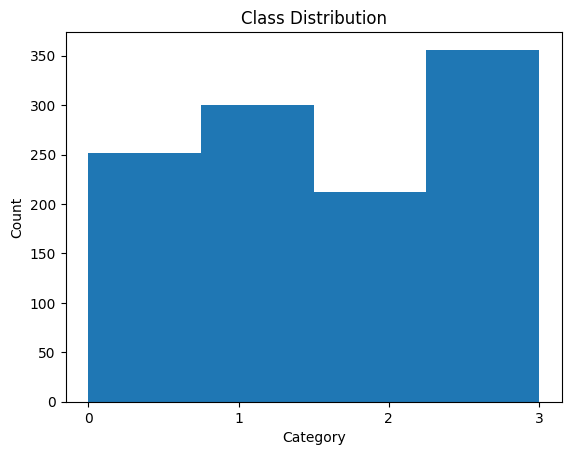

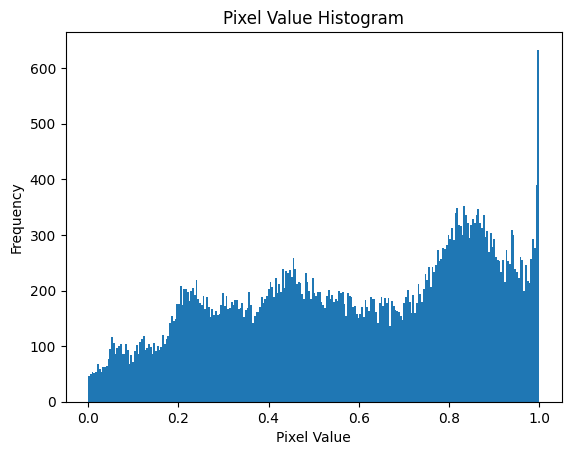

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

! ls
data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]
images = []
labels = []

for category in categories:
    folder_path = os.path.join(data_folder, category)
    label = categories.index(category)  # Assign a numerical label to each category
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize to a common size
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to load image: {img_path}")


# Convert the lists to NumPy arrays
images = np.array(images)
print(images.shape) 
labels = np.array(labels)



# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(labels, bins=len(np.unique(labels)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(labels))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
plt.hist(images[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

When you see a large frequency for pixel value 1 in a histogram, it usually indicates that a significant portion of the image contains very bright or white areas.



#### NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

REVISIONS||
:-|:-|
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-19| CEF, updated to F23 SWMAL.